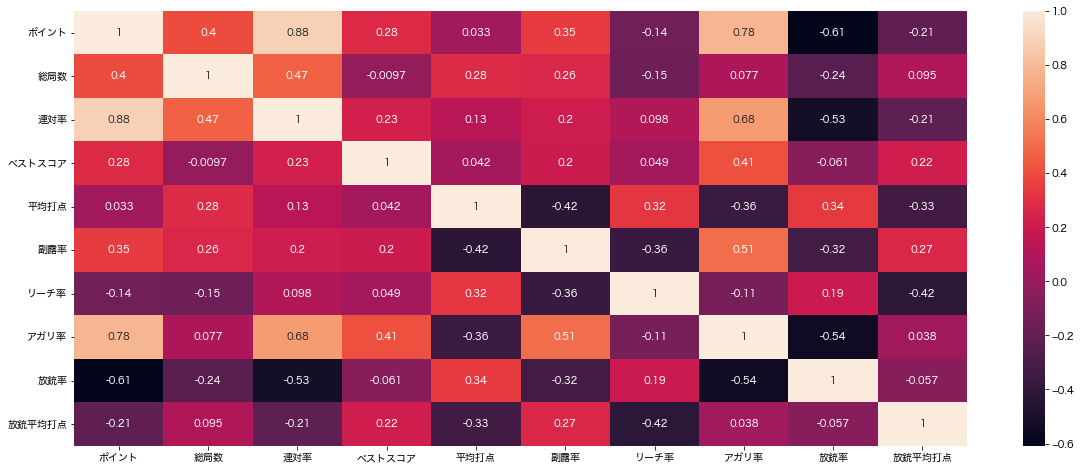

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xfeat
from sklearn.manifold import TSNE
import math
%matplotlib inline

lists = pd.read_html('https://m-league.jp/stats')
img_dir = 'image'
df = pd.DataFrame()
teams = ['drivens','EX','sakura','konami','abemas','sega_summy','raiden','u-next']
j = 0
for i in lists:
    data = i
    data = data.T
    data.columns = data.iloc[0]
    data = data[1:]
    data['チーム'] = teams[j]
    j+=1
    df = pd.concat([df,data])
    
data = pd.DataFrame(df['総局数']/df['試合数'],columns = {'局数/試合数'})
X = df[['ポイント','総局数', '連対率', 'ベストスコア', '平均打点', '副露率', 'リーチ率', 'アガリ率', '放銃率', '放銃平均打点']]
X.reset_index(drop=True,inplace=True)
# X.drop('index',inplace=True,axis=1)
X.to_csv('corr_dat.csv',index=False)

a = pd.read_csv('corr_dat.csv')
fig,ax = plt.subplots(figsize=(20,8))
sns.heatmap(a.corr(),annot=True)
plt.savefig('corr.png')

In [93]:
X = df[['ポイント','総局数', '連対率', 'ベストスコア', '平均打点', '副露率', 'リーチ率', 'アガリ率', '放銃率', '放銃平均打点']]
X.reset_index(drop=True,inplace=True)
# X.drop('index',inplace=True,axis=1)
X.to_csv('corr_dat.csv',index=False)

In [94]:
X.reset_index

<bound method DataFrame.reset_index of 選手名   ポイント    総局数   連対率    ベストスコア     平均打点   副露率  リーチ率  アガリ率   放銃率   放銃平均打点
0     54.1  257.0  0.54   60300.0  6429.82  0.35  0.24  0.22  0.09  6470.83
1   -381.8  228.0   0.3   68600.0  6532.25  0.17  0.25  0.13  0.15  5745.71
2    126.7  275.0  0.56   48200.0  6807.27  0.26  0.18   0.2  0.12  5412.12
3     61.3  122.0  0.45   60500.0  5726.66  0.26   0.2  0.24   0.1  5153.84
4     61.1  224.0   0.7   53800.0   6940.0  0.16  0.22   0.2  0.08  5436.84
5     88.0  243.0  0.52   50500.0  6866.66  0.26  0.17  0.18  0.11  5455.55
6    364.9  282.0  0.62   62300.0  7054.54  0.18  0.23  0.23   0.1  4851.72
7   -232.9  198.0  0.37   66700.0  6822.22  0.17  0.17  0.18  0.12   6240.0
8   -139.7  222.0  0.33   48500.0  6769.44  0.15   0.2  0.16  0.11   5344.0
9   -209.9  169.0   0.4   50500.0  5938.88  0.18  0.22  0.21  0.13  6347.82
10   309.1  253.0  0.65   48900.0  6111.76  0.22  0.17   0.2  0.05  5406.66
11   201.2  286.0  0.56   61800.0  6097.01  0.25 

In [3]:
df['打点期待値'] = df['アガリ率']*df['平均打点']
print(df[['打点期待値']].sort_values('打点期待値',ascending=False))

選手名         打点期待値
瑞原 明奈   1681.5924
茅森 早香    1616.764
松本 吉弘   1563.3422
伊達 朱里紗  1526.2016
東城 りお   1498.0659
滝沢 和典    1491.146
松ヶ瀬 隆弥  1468.7988
二階堂 亜樹   1460.344
丸山 奏子   1408.1934
堀 慎吾    1375.7128
鈴木 たろう  1373.0535
朝倉 康心   1371.5504
園田 賢    1344.6174
小林 剛     1342.825
白鳥 翔    1305.7218
勝又 健志   1295.3915
魚谷 侑未      1290.0
多井 隆晴   1289.9985
近藤 誠一   1265.5548
沢崎 誠    1252.0851
高宮 まり   1197.7904
岡田 紗佳    1187.776
佐々木 寿人   1174.239
黒沢 咲    1139.3264
二階堂 瑠美  1118.5116
内川 幸太郎  1083.1104
石橋 伸洋   1070.7552
日向 藍子      1030.2
萩原 聖人   1028.6304
瀬戸熊 直樹   969.9998
本田 朋広     956.931
村上 淳     905.4318


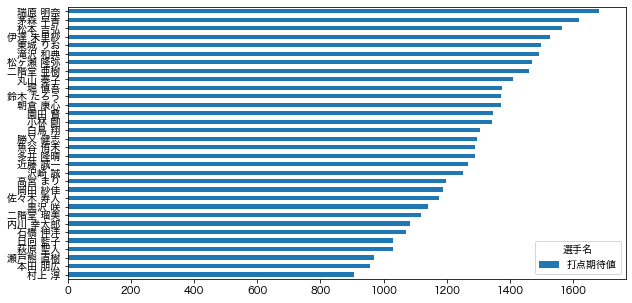

In [4]:
df[['打点期待値']].sort_values('打点期待値',ascending=True).plot(kind='barh',figsize=(10,5))
plt.savefig('打点期待値.png')

In [5]:
df['放銃点期待値'] = df['放銃率']*df['放銃平均打点']
print(df[['放銃点期待値']].sort_values('放銃点期待値',ascending=False))

選手名       放銃点期待値
岡田 紗佳   834.1658
瀬戸熊 直樹  798.8288
村上 淳    770.7168
二階堂 瑠美  734.6664
茅森 早香   668.3712
鈴木 たろう   657.316
高宮 まり    653.461
朝倉 康心   629.0352
二階堂 亜樹  615.6447
東城 りお     612.56
本田 朋広   592.0585
黒沢 咲    587.9995
内川 幸太郎    587.84
堀 慎吾    584.7345
園田 賢    566.4186
魚谷 侑未      553.5
石橋 伸洋     551.25
勝又 健志    537.333
丸山 奏子    535.714
佐々木 寿人    526.25
近藤 誠一    522.962
伊達 朱里紗   515.555
白鳥 翔     510.714
萩原 聖人    491.923
滝沢 和典   488.4822
日向 藍子   475.2936
小林 剛    473.9994
松ヶ瀬 隆弥   473.823
松本 吉弘   454.6815
多井 隆晴      314.7
沢崎 誠    286.3885
瑞原 明奈   208.4615


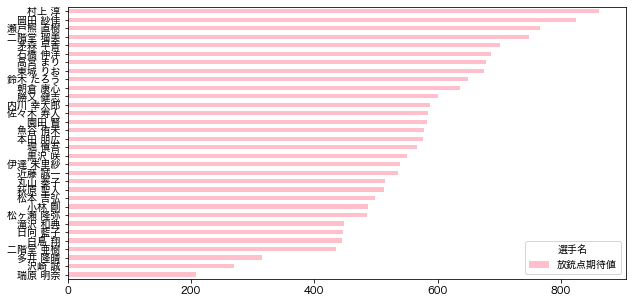

In [98]:
df[['放銃点期待値']].sort_values('放銃点期待値',ascending=True).plot(kind='barh',figsize=(10,5),color='pink')
plt.savefig('放銃点期待値.png')

Text(0, 0.5, '打点期待値')

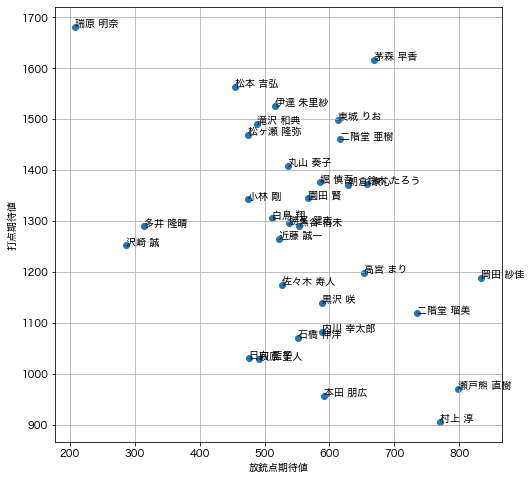

In [8]:
fig,ax = plt.subplots(figsize=(8,8))
plt.scatter(df['放銃点期待値'],df['打点期待値'])
for x, y, name in zip(df['放銃点期待値'], df['打点期待値'], df.index):
    plt.text(x, y, name)
plt.grid()
plt.xlabel('放銃点期待値')
plt.ylabel('打点期待値')

<AxesSubplot:ylabel='チーム'>

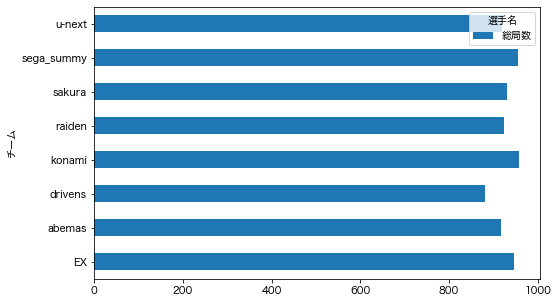

In [100]:
df[['総局数','チーム']].groupby('チーム').sum().plot(kind='barh',figsize=(8,5))

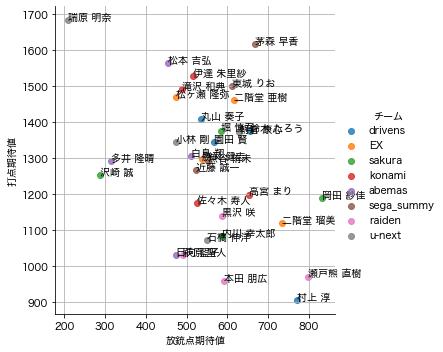

In [9]:
sns.lmplot(x='放銃点期待値',y='打点期待値',data = df,fit_reg = False,hue='チーム')
for x, y, name in zip(df['放銃点期待値'], df['打点期待値'], df.index):
    plt.text(x, y, name)
plt.grid()
plt.savefig('期待値.png')

In [11]:
df.columns

Index(['試合数', '総局数', 'ポイント', '平着', '1位', '2位', '3位', '4位', 'トップ率', '連対率',
       'ラス回避率', 'ベストスコア', '平均打点', '副露率', 'リーチ率', 'アガリ率', '放銃率', '放銃平均打点',
       'チーム', '打点期待値', '放銃点期待値'],
      dtype='object', name='選手名')

In [12]:
X = df[['試合数', '総局数', 'ポイント', '平着', '1位', '2位', '3位', '4位', 'トップ率', '連対率',
       'ラス回避率', 'ベストスコア', '平均打点', '副露率', 'リーチ率', 'アガリ率', '放銃率', '放銃平均打点']]

In [13]:
df.reset_index(inplace=True)

In [14]:
index_df = df[['index','チーム']]

In [15]:
df.drop('index',inplace=True,axis=1)
df.drop('チーム',inplace=True,axis=1)

In [16]:
X =df

/opt/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/DS/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


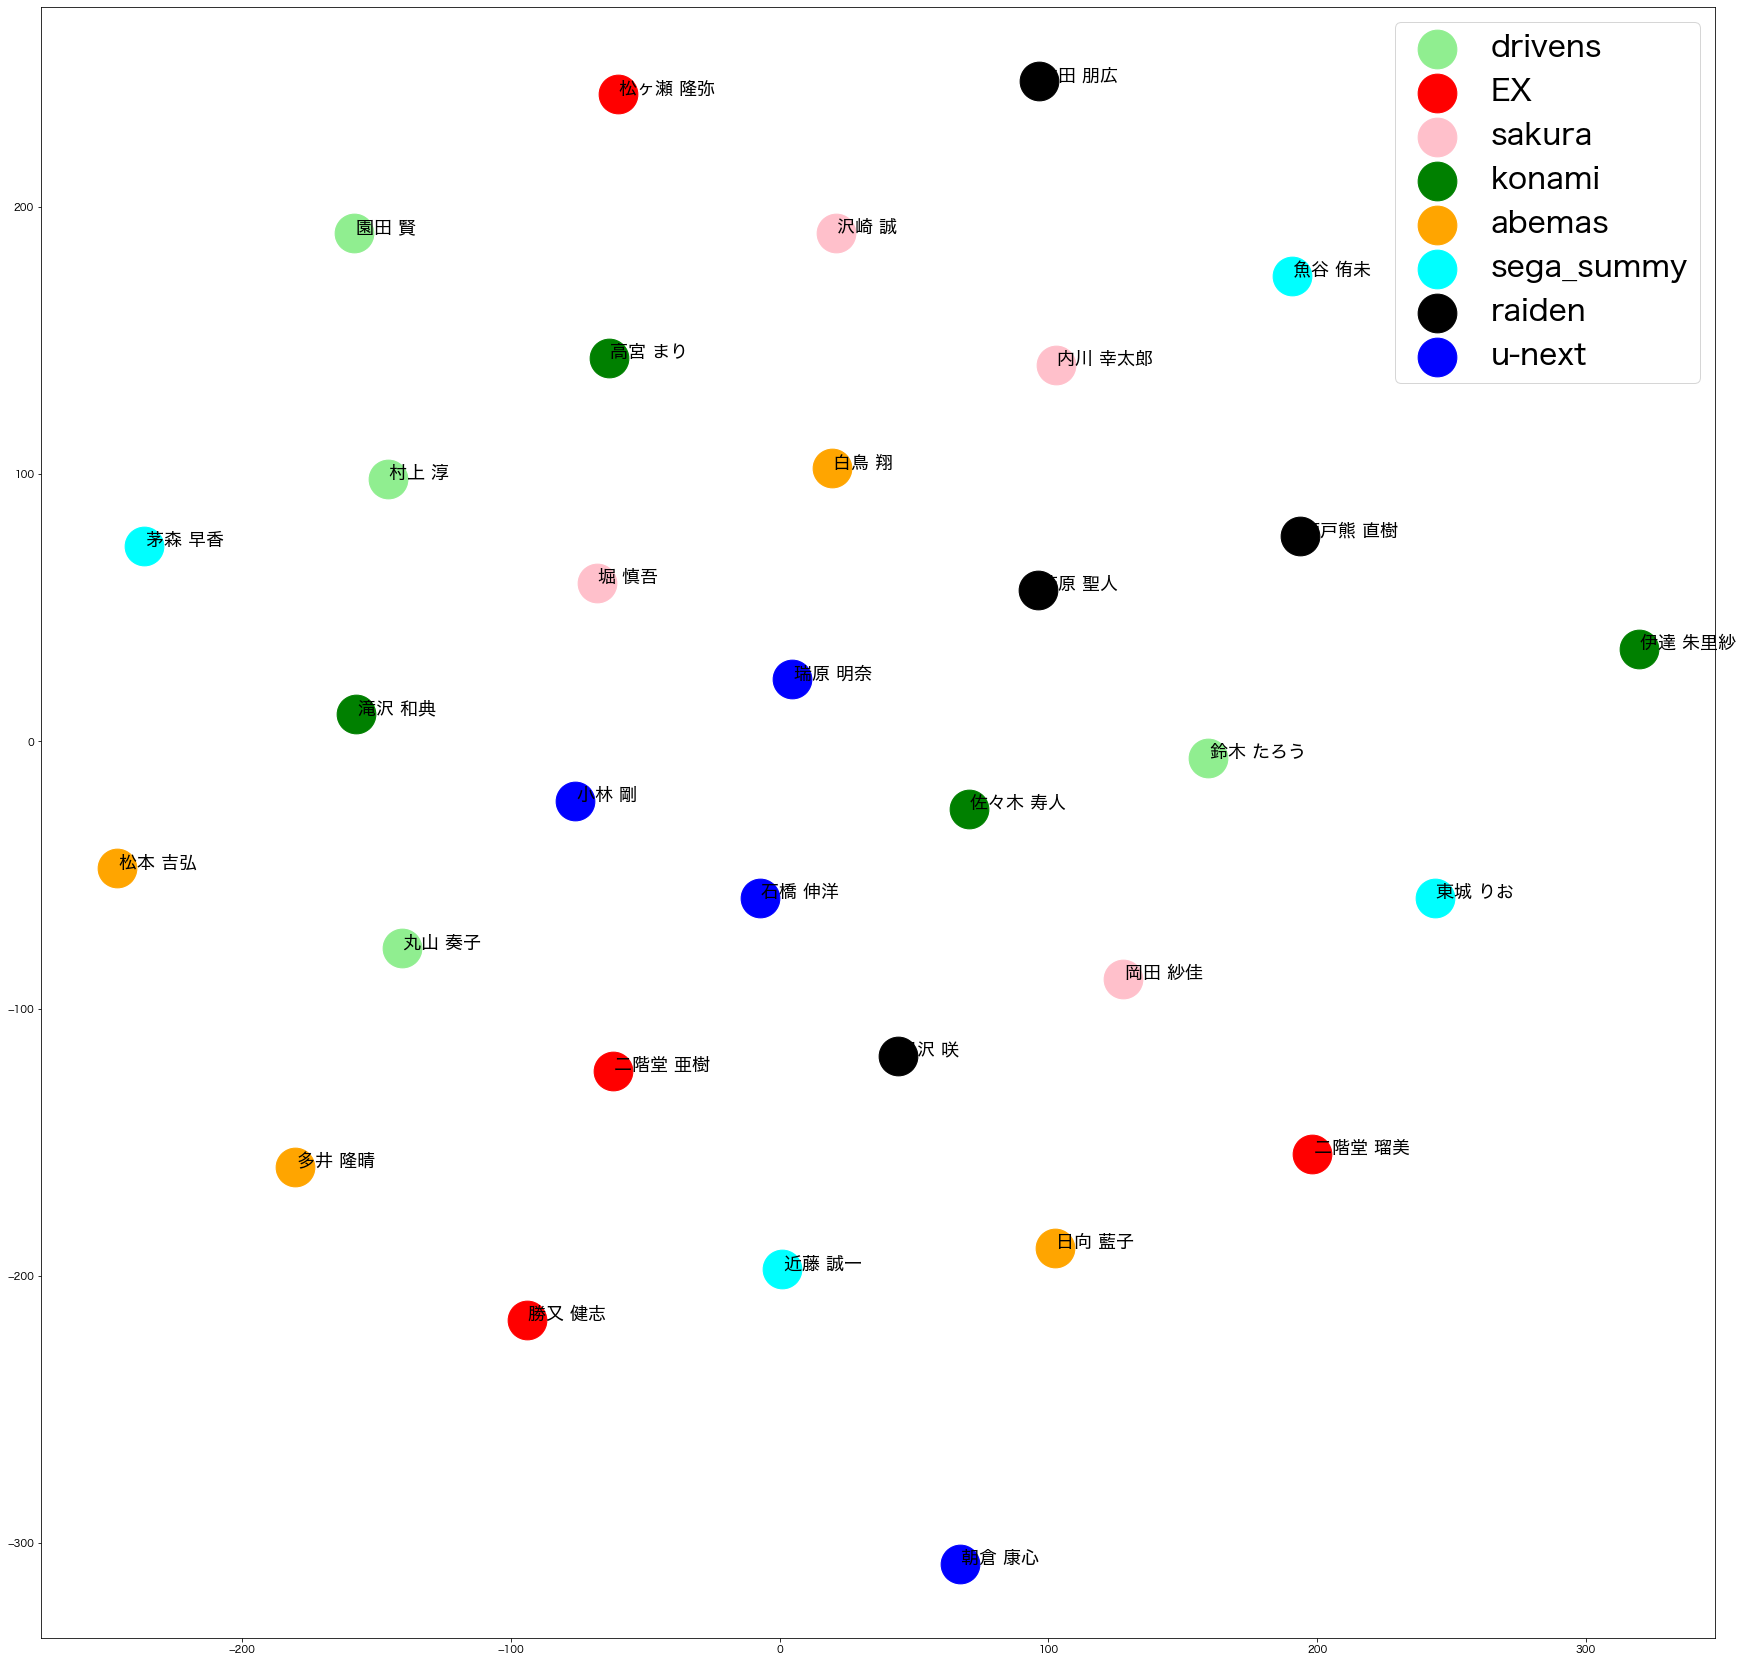

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

#t-SNEで次元削減
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_embedded = tsne.fit_transform(X)

ddf = pd.concat([df, pd.DataFrame(X_embedded, columns = ['col1', 'col2'])], axis = 1)
ddf['チーム'] = index_df['チーム']
article_list = ddf['チーム'].unique()
ddf['選手名'] = index_df['index']

colors =  ["lightgreen", "red", "pink", "g", "orange", "cyan", "k", "b"]
plt.figure(figsize = (30, 30))
for i , v in enumerate(article_list):
    tmp_df = ddf[ddf['チーム'] == v]
    plt.scatter(tmp_df['col1'],  
                tmp_df['col2'],
                label = v,
                color = colors[i],
               s = 1500)

for x, y, name in zip(ddf['col1'], ddf['col2'],ddf['選手名']):
    plt.text(x+0.5, y, name,fontsize=18)

plt.legend(fontsize = 30)
plt.savefig('TSNE.png')

In [109]:
ddf

,試合数,総局数,ポイント,平着,1位,2位,3位,4位,トップ率,連対率,...,リーチ率,アガリ率,放銃率,放銃平均打点,放銃点期待値,打点期待値,col1,col2,チーム,選手名
0,22.0,257.0,54.1,2.4,4.0,8.0,7.0,3.0,0.18,0.54,...,0.24,0.22,0.09,6470.83,582.3747,1414.5604,-48.460953,-85.251022,drivens,園田 賢
1,20.0,228.0,-381.8,2.9,4.0,2.0,6.0,8.0,0.2,0.3,...,0.25,0.13,0.15,5745.71,861.8565,849.1925,-92.132675,60.164104,drivens,村上 淳
2,23.0,275.0,126.7,2.34,8.0,5.0,4.0,6.0,0.34,0.56,...,0.18,0.2,0.12,5412.12,649.4544,1361.454,24.133196,-82.595436,drivens,鈴木 たろう
3,11.0,122.0,61.3,2.45,4.0,1.0,3.0,3.0,0.36,0.45,...,0.2,0.24,0.1,5153.84,515.384,1374.3984,24.061213,28.383190,drivens,丸山 奏子
4,17.0,224.0,61.1,2.35,3.0,9.0,1.0,4.0,0.17,0.7,...,0.22,0.2,0.08,5436.84,434.9472,1388.0,61.207027,57.827244,EX,二階堂 亜樹
5,19.0,243.0,88.0,2.31,7.0,3.0,5.0,4.0,0.36,0.52,...,0.17,0.18,0.11,5455.55,600.1105,1235.9988,101.021454,45.297539,EX,勝又 健志
6,24.0,282.0,364.9,2.2,9.0,6.0,4.0,5.0,0.37,0.62,...,0.23,0.23,0.1,4851.72,485.172,1622.5442,-8.940271,-18.126696,EX,松ヶ瀬 隆弥
7,16.0,198.0,-232.9,2.84,3.0,3.0,3.0,7.0,0.18,0.37,...,0.17,0.18,0.12,6240.0,748.8,1227.9996,-116.731438,-11.117188,EX,二階堂 瑠美
8,18.0,222.0,-139.7,2.72,5.0,1.0,6.0,6.0,0.27,0.33,...,0.2,0.16,0.11,5344.0,587.84,1083.1104,26.812273,-6.554166,sakura,内川 幸太郎
9,15.0,169.0,-209.9,2.83,1.0,5.0,4.0,5.0,0.06,0.4,...,0.22,0.21,0.13,6347.82,825.2166,1247.1648,61.731380,-22.347366,sakura,岡田 紗佳


In [110]:
df

選手名,試合数,総局数,ポイント,平着,1位,2位,3位,4位,トップ率,連対率,ラス回避率,ベストスコア,平均打点,副露率,リーチ率,アガリ率,放銃率,放銃平均打点,放銃点期待値,打点期待値
0,22.0,257.0,54.1,2.4,4.0,8.0,7.0,3.0,0.18,0.54,0.86,60300.0,6429.82,0.35,0.24,0.22,0.09,6470.83,582.3747,1414.5604
1,20.0,228.0,-381.8,2.9,4.0,2.0,6.0,8.0,0.2,0.3,0.6,68600.0,6532.25,0.17,0.25,0.13,0.15,5745.71,861.8565,849.1925
2,23.0,275.0,126.7,2.34,8.0,5.0,4.0,6.0,0.34,0.56,0.73,48200.0,6807.27,0.26,0.18,0.2,0.12,5412.12,649.4544,1361.454
3,11.0,122.0,61.3,2.45,4.0,1.0,3.0,3.0,0.36,0.45,0.72,60500.0,5726.66,0.26,0.2,0.24,0.1,5153.84,515.384,1374.3984
4,17.0,224.0,61.1,2.35,3.0,9.0,1.0,4.0,0.17,0.7,0.76,53800.0,6940.0,0.16,0.22,0.2,0.08,5436.84,434.9472,1388.0
5,19.0,243.0,88.0,2.31,7.0,3.0,5.0,4.0,0.36,0.52,0.78,50500.0,6866.66,0.26,0.17,0.18,0.11,5455.55,600.1105,1235.9988
6,24.0,282.0,364.9,2.2,9.0,6.0,4.0,5.0,0.37,0.62,0.79,62300.0,7054.54,0.18,0.23,0.23,0.1,4851.72,485.172,1622.5442
7,16.0,198.0,-232.9,2.84,3.0,3.0,3.0,7.0,0.18,0.37,0.56,66700.0,6822.22,0.17,0.17,0.18,0.12,6240.0,748.8,1227.9996
8,18.0,222.0,-139.7,2.72,5.0,1.0,6.0,6.0,0.27,0.33,0.66,48500.0,6769.44,0.15,0.2,0.16,0.11,5344.0,587.84,1083.1104
9,15.0,169.0,-209.9,2.83,1.0,5.0,4.0,5.0,0.06,0.4,0.66,50500.0,5938.88,0.18,0.22,0.21,0.13,6347.82,825.2166,1247.1648
